In [ ]:
%pip install pandas numpy matplotlib.pyplot

# Outlier Detection

## 1. Exploring the data set
 
 

### Data set: Bank Marketing


Import the file *dataBank-additional-full_normalised.csv* to load the preprocessed data set. "*The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.*"


Use the column "label" as the response variable. The instances labeled with 1 are the "outliers", in this case the class we would like to detect accurately; the instance labeled with 0 are the inliers. 


The original data description can be found via the link here below. You will also find some explainations regarding the features under the section "Attribute Information".  
https://archive.ics.uci.edu/ml/datasets/bank+marketing





In [2]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import data
data = pd.read_csv('./dataBank-additional-full_normalised.csv', sep=',')


### 1.1. Exploratory data analysis

For the data set, create 2-3 figures and tables that will help you understand the data. 


During the data exploration, you, as a team, are trying to get an impression about the data. You will create figures and/or tables that help you to get to know the data. While exploring the data, you may also consider answering the following questions, which may help you understand the data better. For example, 

- How many instances are there in each class? Are the classes imbalanced?
- How many variables are in the data? What is the data type and the distribution of each variable? 
- Are the variables informative?
- Are any pair of the potential predictor variables highly correlated?
- (Should the variables be normalized or not?)
- (Any relevant, useful preprocessing steps that may be taken?)

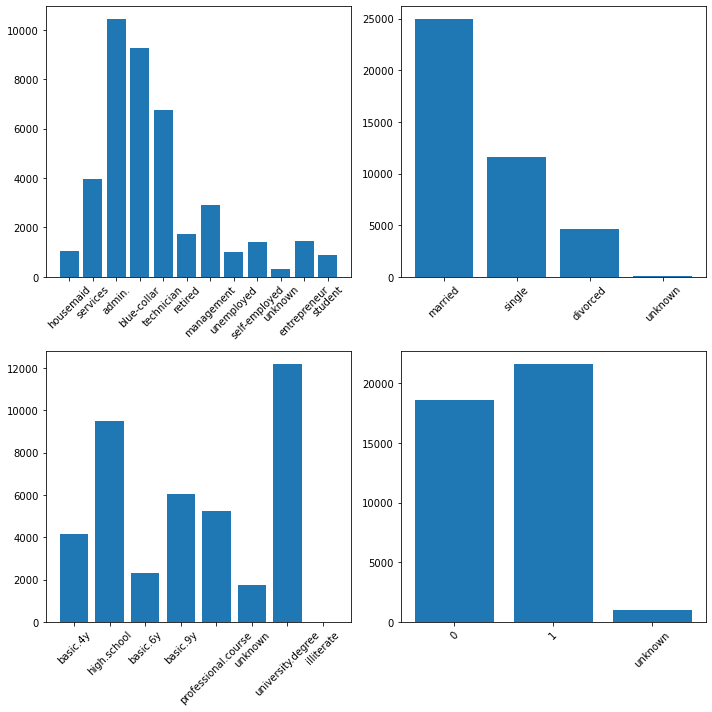

In [3]:
# import packages
import re
import matplotlib.pyplot as plt

# Create an overview of the data
# print(data.describe())
# print(data.columns)

# Plot figure(s)
job_frequency = data[data.columns[pd.Series(data.columns).str.startswith('job')]].sum().to_dict()
job = {re.sub('job=', '', job): job_frequency[job] for job in job_frequency}
marital_frequency = data[data.columns[pd.Series(data.columns).str.startswith('marital')]].sum().to_dict()
marital = {re.sub('marital=', '', marital): marital_frequency[marital] for marital in marital_frequency}
education_frequency = data[data.columns[pd.Series(data.columns).str.startswith('education')]].sum().to_dict()
education = {re.sub('education=', '', education): education_frequency[education] for education in education_frequency}
housing_frequency = data[data.columns[pd.Series(data.columns).str.startswith('housing')]].sum().to_dict()
housing = {re.sub('housing=', '', housing): housing_frequency[housing] for housing in housing_frequency}

fig, axis = plt.subplots(2, 2, figsize=(10,10))
axis[0, 0].bar(job.keys(), job.values())
axis[0, 0].tick_params(axis='x', rotation=45)
axis[0, 1].bar(marital.keys(), marital.values())
axis[0, 1].tick_params(axis='x', rotation=45)
axis[1, 0].bar(education.keys(), education.values())
axis[1, 0].tick_params(axis='x', rotation=45)
axis[1, 1].bar(housing.keys(), housing.values())
axis[1, 1].tick_params(axis='x', rotation=45)
fig.tight_layout()

### 1.2. Creating Train and Test data sets

Create a training and a held-out test data set. *Later in Task 2-4, the training data will be used to perform cross-validation. The held-out test data will be used to evaluate the performance of the selected models.*

Choose the size of your test data and motivate your choice when you discuss the experiment setup in your report. 

In [4]:
# import method to make a train/test split
from sklearn.model_selection import train_test_split

# copy data
df = data.copy()

# create X and y
features = ['age', 'job=housemaid', 'job=services', 'job=admin.', 'job=blue-collar',
       'job=technician', 'job=retired', 'job=management', 'job=unemployed',
       'job=self-employed', 'job=unknown', 'job=entrepreneur', 'job=student',
       'marital=married', 'marital=single', 'marital=divorced',
       'marital=unknown', 'education=basic.4y', 'education=high.school',
       'education=basic.6y', 'education=basic.9y',
       'education=professional.course', 'education=unknown',
       'education=university.degree', 'education=illiterate', 'default=0',
       'default=unknown', 'default=1', 'housing=0', 'housing=1',
       'housing=unknown', 'loan=0', 'loan=1', 'loan=unknown',
       'contact=cellular', 'month=may', 'month=jun', 'month=jul', 'month=aug',
       'month=oct', 'month=nov', 'month=dec', 'month=mar', 'month=apr',
       'month=sep', 'day_of_week=mon', 'day_of_week=tue', 'day_of_week=wed',
       'day_of_week=thu', 'day_of_week=fri', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome=nonexistent', 'poutcome=failure',
       'poutcome=success', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed']
X = df[features]
y = df[['class']]



# create training data and held-out test data
X_train, X_heldout, y_train, y_heldout = train_test_split(X, y, test_size=0.3)

## 2. Decision Trees

### 2.1 Decision Tree

Use the basic [Decision Tree](http://scikit-learn.org/stable/modules/tree.html#tree) library in sklearn to learn a decision tree model by fitting the full training data.

Show/plot the tree diagram and also plot the feature importances. 
What do you observe?

In [7]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Train decision tree classifier
# Please note that default settings creates a huge tree that runs slow
dtree_clf = DecisionTreeClassifier().fit(X_train, y_train)

# Plot decision tree
tree.plot_tree(dtree_clf)
plt.show()

# Grab feature importance value from trained model
feature_importances = dtree_clf.feature_importances_
features = pd.Series(feature_importances, index=X.columns)
top_features = features.nlargest(5)
top_features.plot(kind='barh')

### 2.2 Confusion Matrix and Accuracy

Compute the *confusion matrix* and *accuracy* of the tree using the held-out data set. Moreover, also compute the *recall*, *precision*, and *F1-score* of the tree. 


For this part, you can either implement your own functions or use the following scikit-learn libraries.  
- [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)
- [accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
- [recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)
- [precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)
- [f1 score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
- [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report)


Reflect on the performance of the model and be aware of the difference between *accuracy* and *F1-score*. How good is this decision tree model for outlier detection?

The decision tree with default parameters results in the following scores 
Accuracy: 0.8910738852472283 
Recall: 0.4985486211901306 
Precision: 0.5119225037257824 
F1: 0.5051470588235294
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10979
           1       0.51      0.50      0.51      1378

    accuracy                           0.89     12357
   macro avg       0.72      0.72      0.72     12357
weighted avg       0.89      0.89      0.89     12357



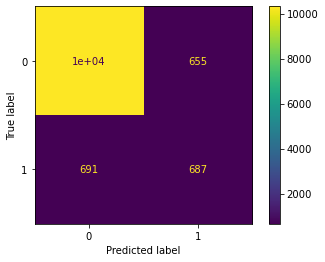

In [32]:
#2.2 Confusion matrix and accurracy 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay

# Use the model to make predictions for the test data set
y_pred = dtree_clf.predict(X_heldout)

# Compute accuracy, recall, precision and f1 score
print(
    'The decision tree with default parameters results in the following scores \nAccuracy: {} \nRecall: {} \nPrecision: {} \nF1: {}'
    .format(
        accuracy_score(y_heldout, y_pred),
        recall_score(y_heldout, y_pred),
        precision_score(y_heldout, y_pred),
        f1_score(y_heldout, y_pred)
    )
)

# Confusion matrix
cm_data = confusion_matrix(y_heldout, y_pred)
c_matrix = ConfusionMatrixDisplay(confusion_matrix=cm_data)
c_matrix.plot()

# Display classification report
clas_report = classification_report(y_heldout, y_pred)
print(clas_report)

### 2.3 Features to Tree

Use the training data to re-fit a new decision tree with the parameter max_depth set to 4. Show the tree diagram and also plot the feature importances. 

Recalculate the performance of this simpler model.

The decision tree with max_depth=4 results in the following scores 
Accuracy: 0.8910738852472283 
Recall: 0.4985486211901306 
Precision: 0.5119225037257824 
F1: 0.5051470588235294
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10979
           1       0.51      0.50      0.51      1378

    accuracy                           0.89     12357
   macro avg       0.72      0.72      0.72     12357
weighted avg       0.89      0.89      0.89     12357



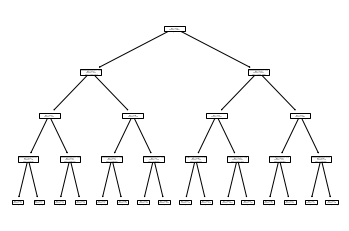

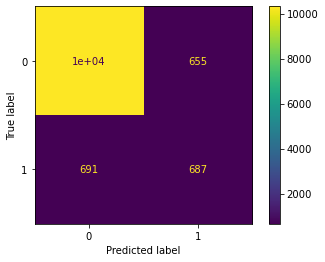

In [33]:
# Learn a decision tree with maximal depth 4
dtree = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)
tree.plot_tree(dtree, feature_names=features) # Plot the tree

# Use the model to make predictions for the test data set
y_pred = clf.predict(X_heldout)

# Compute accuracy, recall, precision and f1 score
print(
    'The decision tree with max_depth=4 results in the following scores \nAccuracy: {} \nRecall: {} \nPrecision: {} \nF1: {}'
    .format(
        accuracy_score(y_heldout, y_pred),
        recall_score(y_heldout, y_pred),
        precision_score(y_heldout, y_pred),
        f1_score(y_heldout, y_pred)
    )
)

# Confusion matrix
cm_data = confusion_matrix(y_heldout, y_pred)
c_matrix = ConfusionMatrixDisplay(confusion_matrix=cm_data)
c_matrix.plot()

# Display classification report
clas_report = classification_report(y_heldout, y_pred)
print(clas_report)


### 2.4 Cross validation

The code example shown here below uses the [kfold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold) method to implement 10-fold cross-validation. Moreover, it uses the cross validation to explore how the max_depth influences the model performance. It keeps track of the validation accuracy scores and F1-scores across the 10 folds. 

In [34]:
from sklearn.model_selection import KFold

# Create 10-fold cross-validation
nk = 10
kf = KFold(n_splits=nk, random_state=0, shuffle=True)

# Search the parameter among the following
depth_range = np.arange(2, 10)

# Initialize accuracy, f1, recall, precision
accuracy = np.zeros((nk , 8))
f1 = np.zeros((nk , 8))
recall = np.zeros((nk , 8))
precision = np.zeros((nk , 8))

i = 0
for train_index , val_index in kf.split(X_train):
    X_t, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_t, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    j = 0
    for depth in depth_range:
        dtree = DecisionTreeClassifier(min_samples_leaf = 1, max_depth = depth)
        dtree.fit(X_t, y_t)
        yhat = dtree.predict(X_val)
        accuracy[i][j] = accuracy_score(yhat , y_val)
        f1[i][j] = f1_score(yhat , y_val)
        recall[i][j] = recall_score(yhat , y_val)
        precision[i][j] = precision_score(yhat , y_val)
        j += 1
    i += 1
    
# Print mean score and best value for max_depth of crossvalidation      
print('Mean accuracy: ' + str(np.mean(accuracy , axis = 0)))
print('Selected model index: ' + str(np.argmax(np.mean(accuracy , axis = 0))))

print('Mean F1: ' + str(np.mean(f1 , axis = 0)))
print('Selected model index: ' + str(np.argmax(np.mean(f1 , axis = 0))))

print('Mean Recall: ' + str(np.mean(recall , axis = 0)))
print('Selected model index: ' + str(np.argmax(np.mean(recall , axis = 0))))

print('Mean Precision: ' + str(np.mean(precision , axis = 0)))
print('Selected model index: ' + str(np.argmax(np.mean(precision , axis = 0))))

Mean accuracy: [0.9024318  0.90787718 0.9129064  0.91422432 0.91606267 0.91335732
 0.91148424 0.91120678]
Selected model index: 4
Mean F1: [0.49517619 0.59406121 0.59916967 0.56268384 0.59574014 0.58687354
 0.57604888 0.57975601]
Selected model index: 2
Mean Recall: [0.59708754 0.59158895 0.62448165 0.66423241 0.65329219 0.63591072
 0.62754122 0.62345718]
Selected model index: 3
Mean Precision: [0.42379732 0.59743252 0.57704633 0.49003647 0.54808402 0.54546059
 0.53313419 0.54304473]
Selected model index: 1


### 2.5 Tree Tuning



The built-in decision tree algorithm you are using has several parameters which you can tune (e.g., *max_depth* and *min_samples_leaf*). Use 10-fold cross-validation (e.g., reuse the code of task 2.4 and adapt the code for two parameters), show how the choice of these parameters affects performance. 

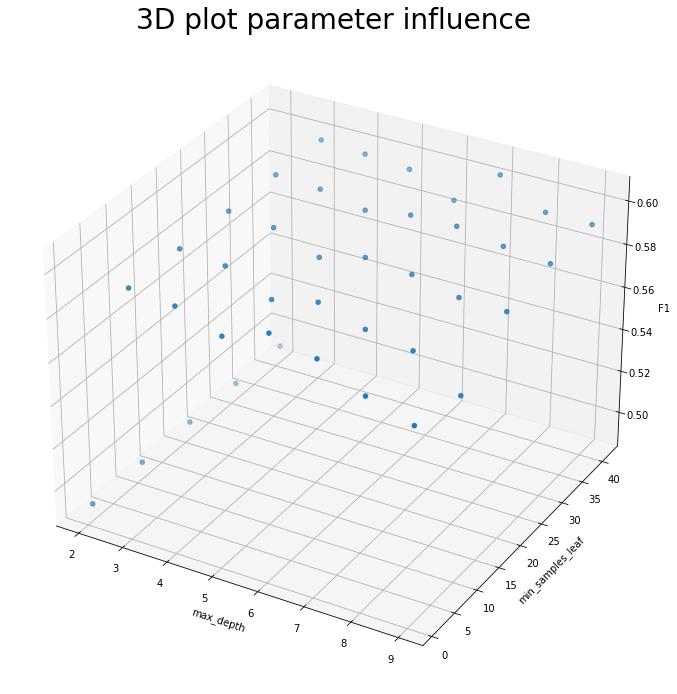


The optimal parameters based on f1 is:
max_depth: 7 
min_samples_leaf: 41


The performance of the model on the heldout data is: 
Accuracy: 0.9113862588006798
Precision: 0.6275
Recall: 0.5374732334047109
F1: 0.5790080738177623

performance of the model


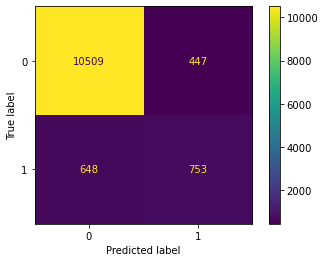

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

# create 10-fold cross-validation
nk = 10
kf = KFold(n_splits=nk, random_state=0, shuffle=True)

# Set search space for parameters
max_depths_range = np.arange(2, 10)
samples_leaf_range = np.arange(1, 50, 10)

# Initialize f1 grids
f1 = np.zeros((nk , len(max_depths_range), len(samples_leaf_range))) # parameter combinations grid
training_f1 = np.zeros((nk , len(max_depths_range))) # max_dept grid for validation
test_f1 = np.zeros((nk , len(max_depths_range))) # max_dept grid for testing

# Loop through parameter ranges and calculate f1
i = 0 # KFold counter
for train_index , val_index in kf.split(X_train):
    X_t, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_t, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    j = 0 # max_depth counter
    for depth in max_depths_range:
        # Train the model
        dtree_clf = DecisionTreeClassifier(min_samples_leaf = 1, max_depth = depth)
        dtree_clf.fit(X_t, y_t)
        # Make predictions for the validation and test data
        validation_prediction = dtree_clf.predict(X_val)
        test_prediction = dtree_clf.predict(X_heldout)
        # Save the f1 of validation and test predictions to grid
        training_f1[i][j] = f1_score(y_val, validation_prediction)
        test_f1[i][j] = f1_score(y_heldout, test_prediction)
        k = 0 # min_samples counter
        for samples in samples_leaf_range:
            # Train the decision tree with the parameter combination
            dtree_clf = DecisionTreeClassifier(min_samples_leaf=samples, max_depth=depth)
            dtree_clf.fit(X_t, y_t)
            # Calculate the f1 on the validation data
            y_pred = dtree_clf.predict(X_val)
            f1[i][j][k] = f1_score(y_val, y_pred)
            k += 1
        j += 1
    i += 1

# Plot 2d graph showing the influence of max_depth on validation and testing f1
fig = go.Figure()
fig.add_trace(go.Scatter(x=max_depths_range, y=np.mean(training_f1 , axis = 0), mode='lines+markers', name='Train')) 
fig.add_trace(go.Scatter(x=max_depths_range, y=np.mean(test_f1 , axis = 0), mode='lines+markers', name='Test'))
fig.update_layout(
    title="2D plot parameter influence",
    xaxis_title="max_depth Decision tree",
    yaxis_title="F1"
)
fig.show()

# Create a dataframe of the cross validated accuracies based on parameter combinations
plotting_data = pd.DataFrame(data={
    'max_depth': [depth for depth in max_depths_range for n_leaf in range(len(samples_leaf_range))],
    'min_samples_leaf': np.tile(samples_leaf_range, len(max_depths_range)),
    'F1': np.mean(f1, axis=0).flatten(), # Take mean f1 of cross validations and flatten it
})

# Create 3D plot to show how the selected parameters affect the performance
fig = plt.figure(figsize=(16, 12))
plot = fig.add_subplot(projection='3d')
plot.scatter(plotting_data['max_depth'], plotting_data['min_samples_leaf'], plotting_data['F1'])
plot.set_xlabel('max_depth')
plot.set_ylabel('min_samples_leaf')
plot.set_zlabel('F1')
plt.title(label="3D plot parameter influence", fontsize=28)
plt.show()

# Get the index of the highest f1 from the f1 grid and translate it to optimal parameters
depth_index, samples_index = list(np.unravel_index(np.argmax(np.mean(f1, axis=0)), np.array(f1).shape))[1:]
best_max_depth, best_sample_leafs = max_depths_range[depth_index], samples_leaf_range[samples_index]

print(
    '\n\033[1m' + 'The optimal parameters based on f1 is:' + '\033[0m' + '\nmax_depth: {} \nmin_samples_leaf: {}'
    .format(
        best_max_depth,
        best_sample_leafs
    ))

# Learn an optimal decision tree model
dtree_clf = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_leaf=best_sample_leafs).fit(X_train, y_train)
y_pred = dtree_clf.predict(X_heldout)

print(
    '\n\033[1m' +'\nThe performance of the model on the heldout data is:' + '\033[0m' +' \nAccuracy: {}\nPrecision: {}\nRecall: {}\nF1: {}'
    .format(
        accuracy_score(y_heldout, y_pred),
        precision_score(y_heldout, y_pred),
        recall_score(y_heldout, y_pred),
        f1_score(y_heldout, y_pred)
    )
)

# Make a confusion matrix
print('\n\033[1m' +'performance of the model')
cm_data = confusion_matrix(y_heldout, y_pred)
c_matrix = ConfusionMatrixDisplay(confusion_matrix=cm_data)
c_matrix.plot()

## 3. Random Forest

Now use a [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to predict the labels for the data set. 

i) use the default values for the parameters to get a RF model running. 

ii) use 10-fold cross-validation to determine a possibly better choice for the parameter *n_estimators* and *max_features*
    
iii) select the best-performing decision tree (i.e., the one that achieved the highest cross-validated performance) and report the performance of the fitted model on the held-out test data ?

In the report, reflect on how does the test performance of RF compare to the decision tree performance? 
 



<ipython-input-50-94074a76c998>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  cl = RandomForestClassifier().fit(X_train, y_train)


The random forest with default parameters results in the following scores 
Accuracy: 0.9126001456664239 
Recall: 0.4632352941176471 
Precision: 0.6428571428571429 
F1: 0.5384615384615385


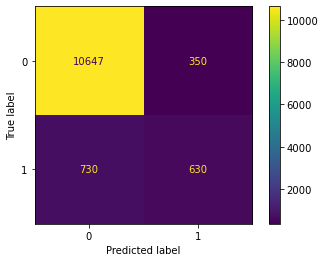

In [50]:
from sklearn.ensemble import RandomForestClassifier

# Default Random Forest model
cl = RandomForestClassifier().fit(X_train, y_train)
predictions = cl.predict(X_heldout)

# Compute accuracy, recall, precision and f1 score
print(
    'The random forest with default parameters results in the following scores \nAccuracy: {} \nRecall: {} \nPrecision: {} \nF1: {}'
    .format(
        accuracy_score(y_heldout, predictions),
        recall_score(y_heldout, predictions),
        precision_score(y_heldout, predictions),
        f1_score(y_heldout, predictions)
    )
)

cm_data = confusion_matrix(y_heldout, predictions)
c_matrix = ConfusionMatrixDisplay(confusion_matrix=cm_data)
c_matrix.plot()

The optimal parameters based on f1 is n_estimators: 130 and max_features: 16
The performance of the model on the heldout data is: 
Accuracy: 0.9117099619648782
Precision: 0.5174875089221984
Recall: 0.6359649122807017
F1: 0.5706414797323888


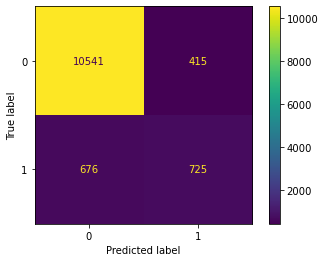

In [36]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create 10-fold cross-validation
nk = 10
kf = KFold(n_splits=nk, random_state=0, shuffle=True)

# Set the search space for the parameters
n_estimators_range = np.arange(50, 150, 20)
n_features_range = np.arange(1, 20, 5)

# Initialize f1 grid
f1 = np.zeros((nk , len(n_estimators_range), len(n_features_range)))

# Learn an optimal random forest model
i = 0 # K Fold count
for train_index , val_index in kf.split(X_train):
    X_t, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_t, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    j = 0
    # Loop through n_estimators and n_features
    for n_estimators in n_estimators_range:
        k = 0
        for n_features in n_features_range:
            # Train the model with the parameters
            rf_tree = RandomForestClassifier(n_estimators=n_estimators, max_features=n_features)
            rf_tree.fit(X_t, y_t.values.ravel())
            # Calculate f1 score
            y_pred = rf_tree.predict(X_val)
            f1[i][j][k] = f1_score(y_val, y_pred)
            k += 1
        j += 1
    i += 1

# Get the optimal parameters from the search space based on the index with the highest f1
estimators_index, features_index = list(np.unravel_index(np.argmax(np.mean(f1, axis=0)), np.array(f1).shape))[1:]
best_n_estimators, best_max_features = n_estimators_range[estimators_index], n_features_range[features_index]

print(
    'The optimal parameters based on f1 is n_estimators: {} and max_features: {}'
    .format(
        best_n_estimators,
        best_max_features
    ))

# Compute the performance of the model on your held-out test data
rf_clf = RandomForestClassifier(n_estimators=best_n_estimators, max_features=best_max_features).fit(X_train, y_train.values.ravel())
prediction = rf_clf.predict(X_heldout)

print(
    'The performance of the model on the heldout data is: \nAccuracy: {}\nPrecision: {}\nRecall: {}\nF1: {}'
    .format(
        accuracy_score(prediction, y_heldout),
        precision_score(prediction, y_heldout),
        recall_score(prediction, y_heldout),
        f1_score(prediction, y_heldout)
    )
)

# Make a confusion matrix
cm_data = confusion_matrix(y_heldout, prediction)
c_matrix = ConfusionMatrixDisplay(confusion_matrix=cm_data)
c_matrix.plot()

## 4. Outlier Detection - Isolation Forest


Use the [Isolation Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html) to detect potential outliers in the data set. 

Again, select two parameters that you would like to investigate and fine-tune (for example, contamination, max_depth, n_estimators, max_samples):

i) Perform 10-fold cross-validation and compute the model performance to obtain the optimal model. 


ii) Compute the accuracy, recall, precision, and F1-score on your held-out test data. 

The optimal parameters based on f1 is max_samples: 250 and n_estimators: 90
The performance of the model on the heldout data is: 
Accuracy: 0.8503682123492757
Precision: 0.3494475138121547
Recall: 0.3581033262561925
F1: 0.35372247465921014


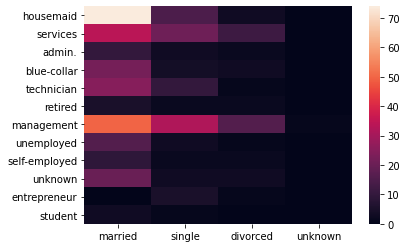

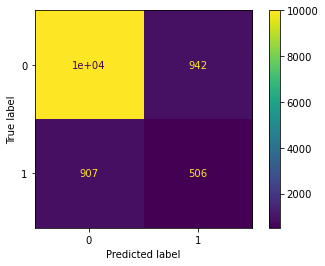

In [36]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

# 10 fold CV of dataset
nk = 10
kf = KFold(n_splits=nk, random_state=0, shuffle=True)

# Search space of the parameters
max_samples_range = np.arange(150, 300, 50)
n_estimators_range = np.arange(50, 150, 20)

# Initialize f1 grid
f1 = np.zeros((nk , len(max_samples_range), len(n_estimators_range)))

# Learn an optimal Isolation Forest model
i = 0 # K Fold count
for train_index , val_index in kf.split(X_train):
    X_t, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_t, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    j = 0
    # Loop through all possible combinations of n_samples and n_estimators
    for n_samples in max_samples_range:
        k = 0
        for n_estimator in n_estimators_range:
            # Train the model with the parameters and calculate accuracy
            isoforest = IsolationForest(max_samples=n_samples, n_estimators=n_estimator, contamination=0.12)
            isoforest.fit(X_t.values)
            y_pred = pd.Series(isoforest.predict(X_val.values)).map({1: 0, -1: 1})
            f1[i][j][k] = f1_score(y_val, y_pred)
            k += 1
        j += 1
    i += 1

# Get the optimal parameters from the search space based on the index with the highest f1
samples_index, estimator_index = list(np.unravel_index(np.argmax(np.mean(f1, axis=0)), np.array(f1).shape))[1:]
best_max_samples, best_n_estimators = max_samples_range[samples_index], n_estimators_range[estimator_index]

print(
    'The optimal parameters based on f1 is max_samples: {} and n_estimators: {}'
    .format(
        best_max_samples,
        best_n_estimators
    ))

# Compute the performance of the model on your held-out test data
isof_clf = IsolationForest(max_samples=best_max_samples, n_estimators=best_n_estimators, contamination=0.12).fit(X_train.values)
y_pred = pd.Series(isof_clf.predict(X_heldout.values)).map({1: 0, -1: 1})

# Display the outliers in a heatmap
heat_df = pd.DataFrame() # Create empty dataframe
job_df = X_heldout[X_heldout.columns[pd.Series(X_heldout.columns).str.startswith('job')]] # Filter all jobs from dataframe
job_df.columns = job_df.columns.str.replace('job=', '') # Remove first part of column string
marital_df = X_heldout[X_heldout.columns[pd.Series(X_heldout.columns).str.startswith('marital')]] # Filter all maritals from dataframe
marital_df.columns = marital_df.columns.str.replace('marital=', '') # Remove first part of column string
heat_df['job'] = pd.get_dummies(job_df).idxmax(1) # Bring one-encoded columns back to one column
heat_df['marital'] = pd.get_dummies(marital_df).idxmax(1) # Bring one-encoded columns back to one column
heat_df['predicted'] = y_pred
heat = pd.DataFrame(columns=marital_df.columns, index=job_df.columns)

# Loop through the unique maritals and jobs to find the outliers
for maried in heat_df['marital'].unique():
    outlier_count = []
    for job in heat_df['job'].unique():
        # Count the number of outliers in the category
        values = heat_df.apply(lambda x: True if x['job'] == job and x['marital'] == maried and x['predicted'] == 1 else False , axis=1)
        count = len(values[values == True].index)
        outlier_count.append(count)
    heat[maried] = outlier_count

# Displaying the result
sns.heatmap(heat)

print(
    'The performance of the model on the heldout data is: \nAccuracy: {}\nPrecision: {}\nRecall: {}\nF1: {}'
    .format(
        accuracy_score(y_heldout, y_pred),
        precision_score(y_heldout, y_pred),
        recall_score(y_heldout, y_pred),
        f1_score(y_heldout, y_pred)
    )
)

# Make a confusion matrix
cm_data = confusion_matrix(y_heldout, y_pred)
c_matrix = ConfusionMatrixDisplay(confusion_matrix=cm_data)
c_matrix.plot()

## 5. Report your results and discuss your findings

By now, you have applied three algorithms with different parameters on the data set. For each algorithm, you have create tables or figures which you can add to your report. Discuss the results and their optimal performance. 

Create an overview table or figure that show the optimal performance of each algorithm on the data set, for example see the table here below. 

Discuss your findings and reflect on the following questions:
- According to the performance results, which one is the optimal model? 
- How large is the difference between the accuracy score and the F1 score for each model? What caused the difference?
- Would you use the accuracy score, recall, preceision, or F1-score for selecting the model? Why?





| Model | CV Accuracy  | Test Accuracy |  CV Recall  |  Test Recall  | CV F1 | Test F1 |... |
|------|------|------|------|------|------|------|-----|
|   Decision Tree        |  |  | | | | |
|   Random Forest  |  |  | || | |
|   Isolation Forest        |  |  | || | |



## Bonus Tasks 

We would like to challenge you with the following bonus tasks. For each task that is successfully completed, you may obtain max. 1 extra point. 

1. Implement another outlier detection algorithm or design your own outlier detection algorithm that achieves a better F1 score. 
2. Implement techniques (e.g., preprocessing, feature engineering, sampling) that help improve the F1 scores of existing models


The optimal parameters based on accuracy is n_neighbors: 1 and leaf_size: 1
The performance of the model on the heldout data is: 
Accuracy: 0.6658574087561706
Precision: 0.1003531489111242
Recall: 0.2413305024769993
F1: 0.1417584701725213


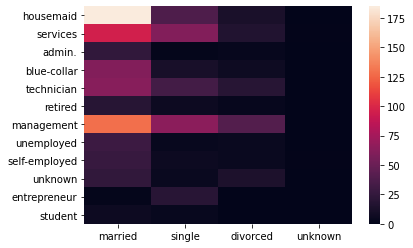

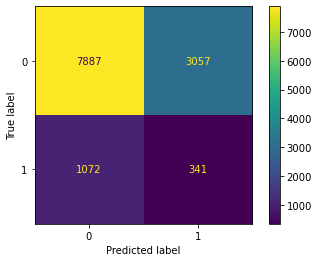

In [38]:
# Bonus task 1
# Local Outlier Factor is a density based unsupervised outlier technique
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# 10 fold CV of dataset
nk = 10
kf = KFold(n_splits=nk, random_state=0, shuffle=True)

# Search space of the parameters
n_neighbours_range = np.arange(1, 100, 10)
leaf_size_range = np.arange(1, 100, 10)

# Initialize f1 grid
f1 = np.zeros((nk , len(n_neighbours_range), len(leaf_size_range)))

# Learn an optimal LocalOutlierFactor model
i = 0 # K Fold count
for train_index , val_index in kf.split(X_train):
    X_t, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_t, y_val = y_train.iloc[train_index], y_train.iloc[val_index]
    j = 0
    # Loop through all possible combinations of n_neighbours and leaf_size
    for n_neighbours in n_neighbours_range:
        k = 0
        for leaf_size in leaf_size_range:
            # Train the model with the parameters and calculate f1
            lof_outlier = LocalOutlierFactor(n_neighbors=n_neighbours, leaf_size=leaf_size, novelty=False)
            y_pred = pd.Series(lof_outlier.fit_predict(X_val.values)).map({1:0, -1: 1})
            f1[i][j][k] = f1_score(y_val, y_pred)
            k += 1
        j += 1
    i += 1

# Get the optimal parameters from the search space based on the index with the highest f1
neighbour_index, leaf_index = list(np.unravel_index(np.argmax(np.mean(f1, axis=0)), np.array(f1).shape))[1:]
best_n_neighbours, best_n_leafs = n_neighbours_range[neighbour_index], leaf_size_range[leaf_index]

print(
    'The optimal parameters based on f1 is n_neighbors: {} and leaf_size: {}'
    .format(
        best_n_neighbours,
        best_n_leafs
    ))

# Compute the performance of the model on your held-out test data
lof_outlier = LocalOutlierFactor(n_neighbors=best_n_neighbours, leaf_size=best_n_leafs, novelty=False)
y_pred = pd.Series(lof_outlier.fit_predict(X_heldout.values)).map({1:0, -1: 1})

# Display the outliers in a heatmap
heat_df = pd.DataFrame() # Create empty dataframe
job_df = X_heldout[X_heldout.columns[pd.Series(X_heldout.columns).str.startswith('job')]] # Filter all jobs from dataframe
job_df.columns = job_df.columns.str.replace('job=', '') # Remove first part of column string
marital_df = X_heldout[X_heldout.columns[pd.Series(X_heldout.columns).str.startswith('marital')]] # Filter all maritals from dataframe
marital_df.columns = marital_df.columns.str.replace('marital=', '') # Remove first part of column string
heat_df['job'] = pd.get_dummies(job_df).idxmax(1) # Bring one-encoded columns back to one column
heat_df['marital'] = pd.get_dummies(marital_df).idxmax(1) # Bring one-encoded columns back to one column
heat_df['predicted'] = y_pred
heat = pd.DataFrame(columns=marital_df.columns, index=job_df.columns)

# Loop through the unique maritals and jobs to find the outliers
for maried in heat_df['marital'].unique():
    outlier_count = []
    for job in heat_df['job'].unique():
        # Count the number of outliers in the category
        values = heat_df.apply(lambda x: True if x['job'] == job and x['marital'] == maried and x['predicted'] == 1 else False , axis=1)
        count = len(values[values == True].index)
        outlier_count.append(count)
    heat[maried] = outlier_count

# Displaying the result
sns.heatmap(heat)

print(
    'The performance of the model on the heldout data is: \nAccuracy: {}\nPrecision: {}\nRecall: {}\nF1: {}'
    .format(
        accuracy_score(y_heldout, y_pred),
        precision_score(y_heldout, y_pred),
        recall_score(y_heldout, y_pred),
        f1_score(y_heldout, y_pred)
    )
)

# Make a confusion matrix
cm_data = confusion_matrix(y_heldout, y_pred)
c_matrix = ConfusionMatrixDisplay(confusion_matrix=cm_data)
c_matrix.plot()

In [ ]:
# Bonus task 2
# Use more (high-quality) data and feature engineering --> feature selection
# can be possible that we have to many features --> some features could be noise

# Train a default decision tree to detect important features
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

# Grab feature importance value from trained model
feature_importances = pd.DataFrame(clf.feature_importances_, index = X.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances

# Define range for selecting import features 
range_of_features = list(range(2,62,2))

def accuracy_features(feature):
    clf = DecisionTreeClassifier()
    clf.fit(X_train[list(feature_importances.index[:feature])], y_train)
    y_predict = clf.predict(X_heldout[list(feature_importances.index[:feature])])
    return accuracy_score(y_heldout, y_predict)

accuracy_scores_clf = []
for n in range_of_features:
    current_accuracy = accuracy_features(n)
    accuracy_scores_clf.append(current_accuracy)

accuracy_scores_clf

plt.plot(range_of_features, accuracy_scores_clf)
plt.ylim((.80, .99))
plt
